In [33]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
import tensorflow as tf
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [34]:
Audiofiles=r'C:\Users\hp\Desktop\coding\ML projects\Audio_Classifications\Multimodular\Cat&Dog\audio'

In [35]:
cat_files = glob(os.path.join(Audiofiles, 'cat', '*.wav'))
dog_files = glob(os.path.join(Audiofiles, 'dog', '*.wav'))

# Load the first cat audio file
if cat_files:
    y, sr = librosa.load(cat_files[300],sr=None)
    print(f'y: {y[:10]}')
    print(f'shape y: {y.shape}')
    print(f'sr: {sr}')
else:
    print("No cat audio files found.")

y: [ 0.00311279  0.00366211  0.00543213  0.00756836  0.00778198  0.00668335
  0.00494385  0.00231934 -0.00076294 -0.00222778]
shape y: (16000,)
sr: 16000


In [36]:
if dog_files:
    z, d_sr = librosa.load(dog_files[300],sr=None)
    print(f'y: {z[:10]}')
    print(f'shape y: {z.shape}')
    print(f'sr: {d_sr}')
else:
    print("No cat audio files found.")

y: [0.00134277 0.00271606 0.00289917 0.00292969 0.00228882 0.00283813
 0.00292969 0.00280762 0.00341797 0.00241089]
shape y: (14118,)
sr: 16000


In [37]:
y_list = []
sr_list = []

for file in cat_files:
    y, sr = librosa.load(file, sr=None)
    y_list.append(y)
    sr_list.append(sr)


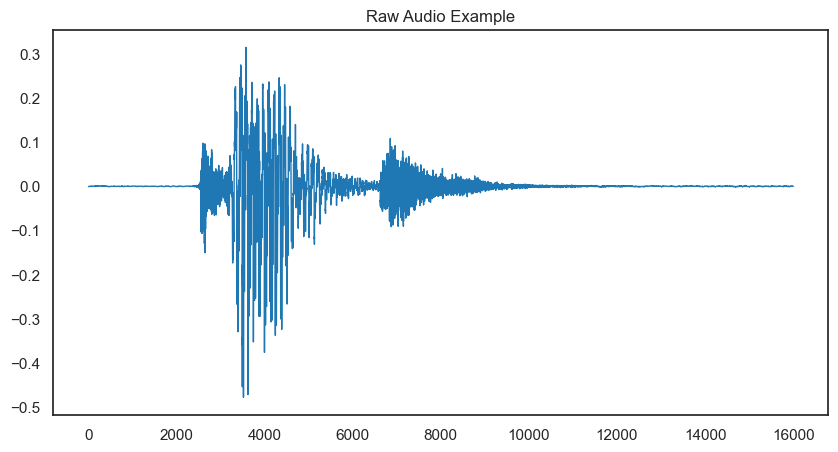

In [38]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

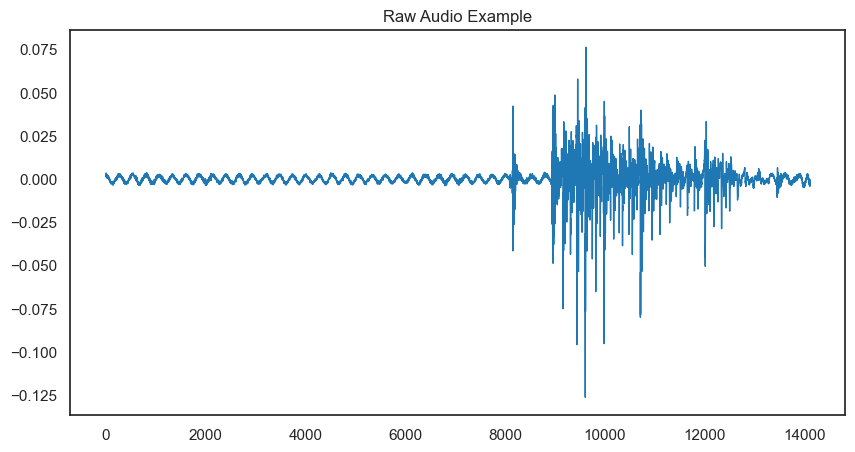

In [39]:
pd.Series(z).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [40]:
dog_y_list = []
dog_sr_list = []

for file in dog_files:
    y, sr = librosa.load(file, sr=None)
    dog_y_list.append(y)
    dog_sr_list.append(sr)


In [41]:
len(y_list)

1733

In [42]:
def preprocessing(audio):
    
    S = librosa.feature.melspectrogram(y=audio,
                                   sr=16000,
                                   n_mels=128)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max) 
    return S_db_mel

In [43]:
dog_mel=[]
cat_mel=[]
for audio in dog_y_list:
    mel=preprocessing(audio)
    dog_mel.append(mel)

for audio in y_list:
    mel=preprocessing(audio)
    cat_mel.append(mel)    
    

In [44]:
unique_shapes = set(spec.shape for spec in cat_mel if spec is not None)
print(unique_shapes)
unique_shapes = set(spec.shape for spec in dog_mel if spec is not None)
print(unique_shapes)



{(128, 17), (128, 24), (128, 30), (128, 23), (128, 29), (128, 26), (128, 32), (128, 16), (128, 22), (128, 19), (128, 25), (128, 28), (128, 18), (128, 31), (128, 21), (128, 27)}
{(128, 17), (128, 24), (128, 30), (128, 20), (128, 23), (128, 29), (128, 26), (128, 32), (128, 22), (128, 19), (128, 25), (128, 15), (128, 28), (128, 18), (128, 31), (128, 21), (128, 27)}


In [45]:
from collections import Counter

shape_counts = Counter(spec.shape for spec in dog_mel if spec is not None)
for shape, count in shape_counts.items():
    print(f"Shape {shape}: {count} samples")

shape_counts = Counter(spec.shape for spec in cat_mel if spec is not None)
for shape, count in shape_counts.items():
    print(f"Shape {shape}: {count} samples")
    


Shape (128, 32): 1539 samples
Shape (128, 31): 46 samples
Shape (128, 19): 4 samples
Shape (128, 25): 20 samples
Shape (128, 26): 14 samples
Shape (128, 29): 11 samples
Shape (128, 30): 23 samples
Shape (128, 22): 7 samples
Shape (128, 24): 8 samples
Shape (128, 27): 21 samples
Shape (128, 23): 12 samples
Shape (128, 28): 23 samples
Shape (128, 17): 3 samples
Shape (128, 21): 3 samples
Shape (128, 18): 1 samples
Shape (128, 20): 1 samples
Shape (128, 15): 2 samples
Shape (128, 32): 1515 samples
Shape (128, 22): 10 samples
Shape (128, 31): 36 samples
Shape (128, 28): 17 samples
Shape (128, 29): 16 samples
Shape (128, 27): 30 samples
Shape (128, 26): 10 samples
Shape (128, 21): 6 samples
Shape (128, 24): 7 samples
Shape (128, 18): 3 samples
Shape (128, 30): 44 samples
Shape (128, 17): 1 samples
Shape (128, 25): 17 samples
Shape (128, 23): 17 samples
Shape (128, 19): 3 samples
Shape (128, 16): 1 samples


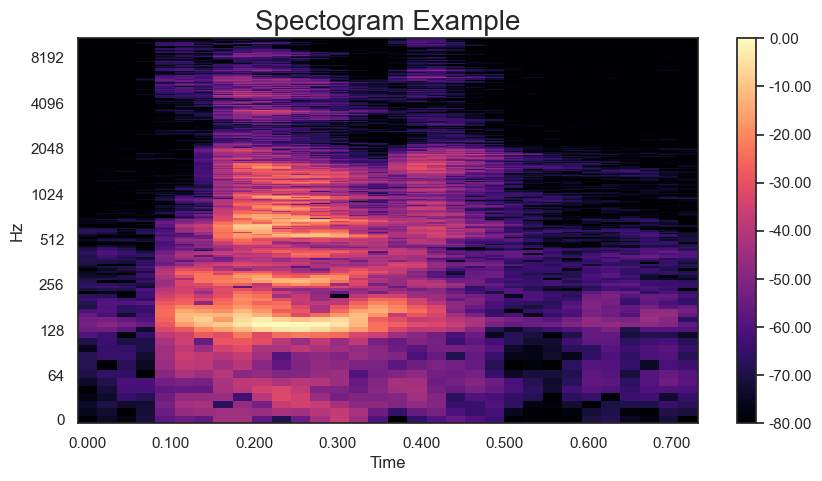

In [46]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()
print(img)

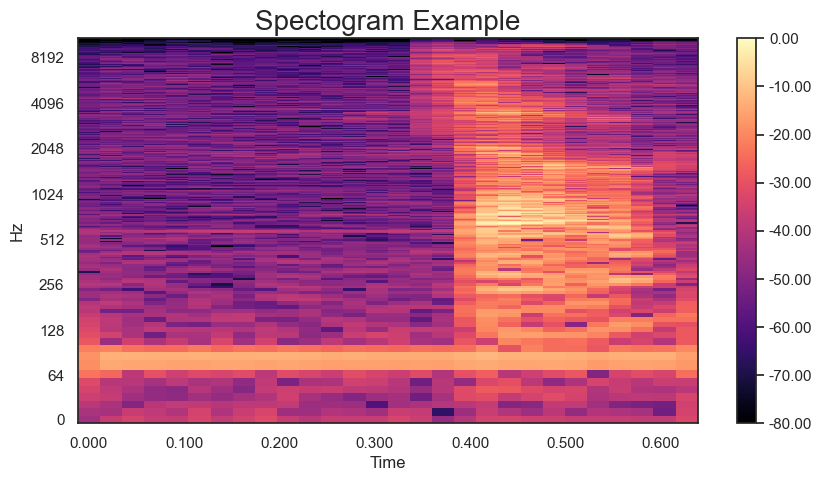

In [47]:
D = librosa.stft(z)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()
print(img)

(128, 32)


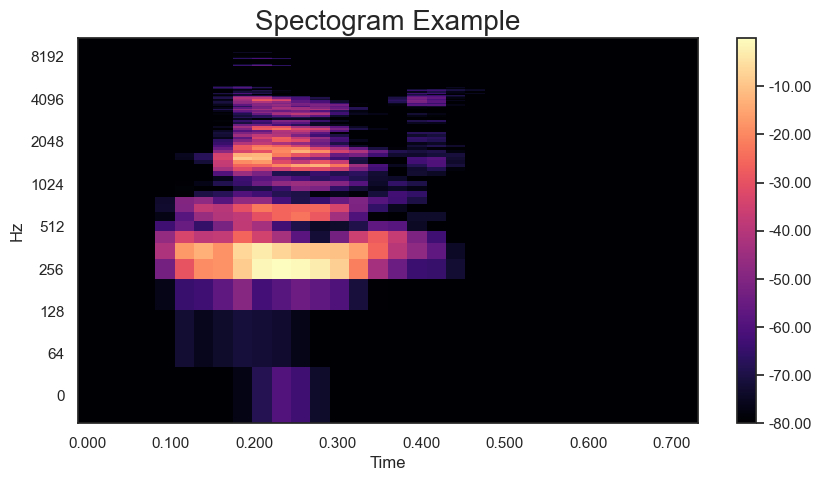

In [48]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

print(S_db_mel.shape)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()
print(img)

(128, 28)


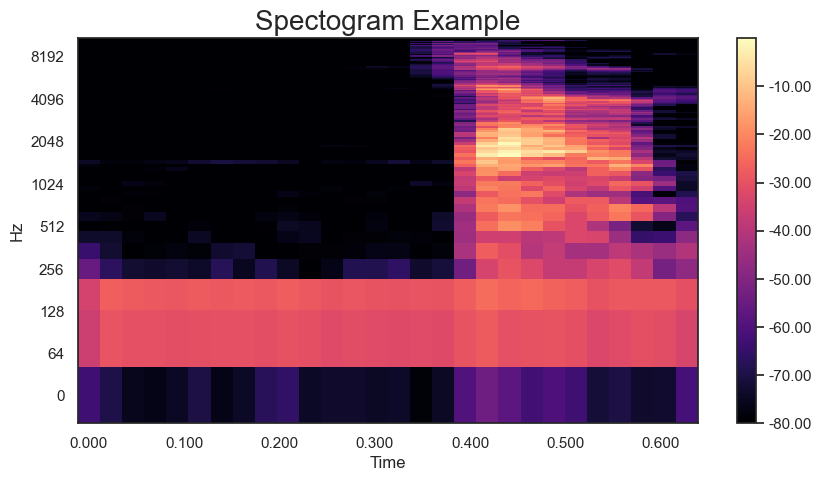

In [49]:
S = librosa.feature.melspectrogram(y=z,
                                   sr=sr,
                                   n_mels=128)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

print(S_db_mel.shape)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()
print(img)

In [ ]:
label_map = {
    'cat': 0,
    'dog': 1,
}


def make_labeled_dataset(folder_name, label):
    path_pattern = os.path.join(Audiofiles, folder_name, '*.wav')  
    print(f"Looking for files in: {path_pattern}")  # Optional debug
    files = tf.data.Dataset.list_files(path_pattern, shuffle=False)
    file_count = tf.data.experimental.cardinality(files).numpy()
    labels = tf.data.Dataset.from_tensor_slices(tf.repeat(label, file_count))
    return tf.data.Dataset.zip((files, labels))

# Step 3: Build and combine datasets
dataset = None
for name, label in label_map.items():
    ds = make_labeled_dataset(name, label)
    if dataset is None:
        dataset = ds
    else:
        dataset = dataset.concatenate(ds)

print("✅ Dataset prepared successfully.")


Looking for files in: C:\Users\hp\Desktop\coding\ML projects\Audio_Classifications\Multimodular\Cat&Dog\audio\cat\*.wav
Looking for files in: C:\Users\hp\Desktop\coding\ML projects\Audio_Classifications\Multimodular\Cat&Dog\audio\dog\*.wav
✅ Dataset prepared successfully.


In [51]:
# Convert the tf.data.Dataset to a list of (file_path, label) tuples
data_list = [(file_path.numpy().decode('utf-8'), int(label.numpy()))
             for file_path, label in dataset]

# Convert to pandas DataFrame
df = pd.DataFrame(data_list, columns=['file_path', 'label'])

print(df.head())

                                           file_path  label
0  C:\Users\hp\Desktop\coding\ML projects\Audio_C...      0
1  C:\Users\hp\Desktop\coding\ML projects\Audio_C...      0
2  C:\Users\hp\Desktop\coding\ML projects\Audio_C...      0
3  C:\Users\hp\Desktop\coding\ML projects\Audio_C...      0
4  C:\Users\hp\Desktop\coding\ML projects\Audio_C...      0


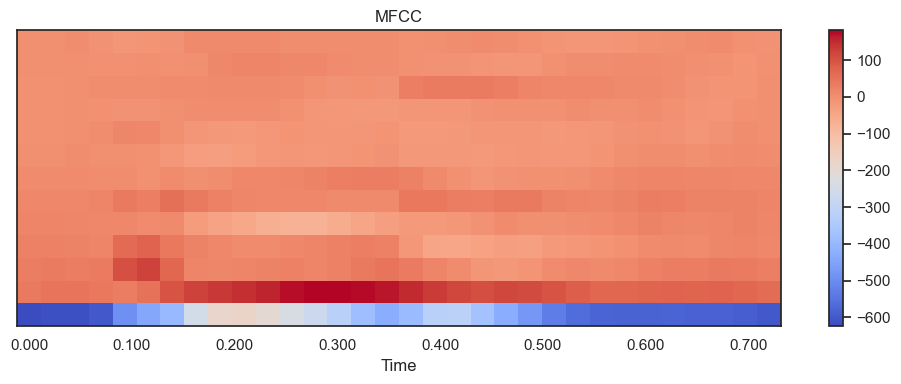

In [52]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [53]:
def preprocessing(file, target_frames=32, n_mels=128):
    try:
        # Load audio at original sample rate
        audio, sample_rate = librosa.load(file, sr=None, res_type='kaiser_fast')

        # Compute mel spectrogram
        S = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels)

        # Convert to dB scale (log-mel)
        S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

        # Pad or truncate to fixed size (128 mel bands x target_frames)
        S_fixed = librosa.util.fix_length(S_db_mel, size=target_frames, axis=1)

        return S_fixed

    except Exception as e:
        print(f"Error processing {file}: {e}")
        return None

In [54]:

df['mel'] = df['file_path'].apply(lambda path: preprocessing(path))


In [55]:

df.drop(columns=['file_path'],inplace=True)


In [56]:
X = np.stack(df['mel'].values)  # Shape: (num_samples, n_mels, target_frames)
y = df['label'].values 


In [67]:
X = X[..., np.newaxis]  # Shape: (num_samples, n_mels, target_frames, 1)


In [68]:
from sklearn.model_selection import train_test_split
batch_size = 32
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)



In [69]:

print(train_ds.element_spec)


(TensorSpec(shape=(None, 128, 32, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))


In [70]:
samples, labels = train_ds.as_numpy_iterator().next()
samples.shape

(32, 128, 32, 1)

(128, 32)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D



In [112]:
model = Sequential()
model.add(Conv2D(16, (2,2), activation='relu', padding='same',input_shape=(128, 32, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(GlobalAveragePooling2D())  # Better than Flatten for large maps
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 32, 16)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 64, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 62, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 31, 7, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 29, 5, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 2, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,665 (123.69 KB)

 Trainable params: 31,665 (123.69 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
hist = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.5312 - loss: 0.9791 - precision_8: 0.5326 - recall_8: 0.5698 - val_accuracy: 0.7295 - val_loss: 0.5016 - val_precision_8: 0.6558 - val_recall_8: 0.9127
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8071 - loss: 0.4350 - precision_8: 0.7965 - recall_8: 0.8114 - val_accuracy: 0.8777 - val_loss: 0.2915 - val_precision_8: 0.9049 - val_recall_8: 0.8313
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8577 - loss: 0.3430 - precision_8: 0.8665 - recall_8: 0.8400 - val_accuracy: 0.8820 - val_loss: 0.3097 - val_precision_8: 0.8765 - val_recall_8: 0.8765
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8478 - loss: 0.3448 - precision_8: 0.8415 - recall_8: 0.8705 - val_accuracy: 0.9079 - val_loss: 0.2419 - val_precision_8: 0.9379 - val_recall_8: 0.8645
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8853 - loss: 0.2907 - precision_8: 0.8914 - recall_8: 0.8796 - val_

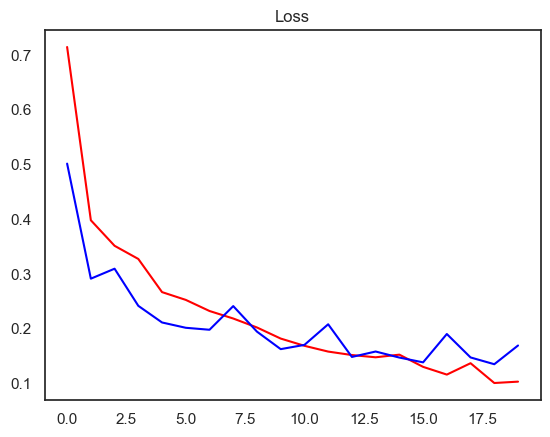

In [114]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()


In [115]:
data = train_ds.take(20)
y_test = tf.concat([y for x, y in data], axis=0)


In [116]:
y_prd= model.predict(data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [122]:
result = [1 if prediction > 0.9 else 0 for prediction in y_prd]
compare=[]
for i in range(len(result)):
    compare.append(result[i]-y_test[i].numpy())




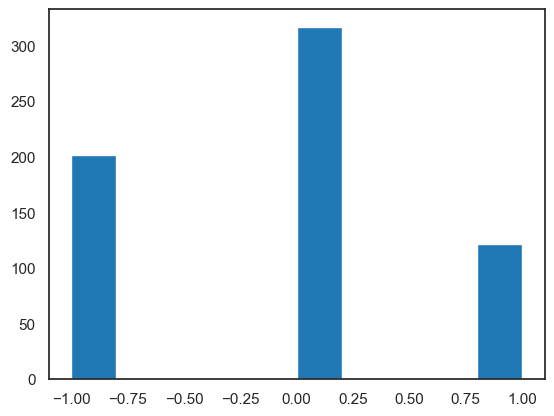

In [124]:
plt.hist(compare)
plt.show()